# Lab 8 : Star Formation 

In [21]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [158]:
def StarFormationRate(L, Type, TIR = 0):
    """ Function that computes the star formation rate of a galaxy
    following Kennicut & Evans 2012 Eq 12 (ARA&A 50)
    parameters:
    -----------
        L : 'float'
            luminosity of the galaxy in erg/s
        Type: 'String'
            The Wavelength: 'FUV', 'NUV', 'TIR', 'Halpha'
        TIR: 'Float'
            Total Infared luminosity in erg/s (default = 0)
        OUTPUT:
            SFR: 'float'
            Log of the Star Formation Rate (Msun/yr)
    """
    if (Type == 'FUV'):
        logCx = 43.35 # Calibration from LFUV to SFR
        TIRc = 0.46 # Correction for dust absorption
    elif (Type == 'NUV'):
        logCx = 43.17
        TIRc = 0.27
    elif (Type == 'Halpha'):
        logCx = 41.27
        TIRc = 0.0024
    elif (Type == 'TIR'):
        logCx = 43.41
        TIRc = 0
    else:
        print ("WARNING: missing wavelength")
    # Correct the luminosity for the dust using the TIR
    Lcorr = L + TIRc*TIR

    # star formation rate
    SFR = np.log10(Lcorr) - logCx
    return SFR


Let's try to reproduce SFRs derived for the WLM Dwarf Irregular Galaxy using UV luminosities measured with Galex. 

Compare results to Table 1 from Lee et al. 2009 (who used the older Kennicutt 98 methods)
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED (Photometry and SED):
https://ned.ipac.caltech.edu/

In [72]:
# First need the Luminosity of the Sun in the right units
const.L_sun
LsunErgS = const.L_sun.to(u.erg/u.s).value
print(LsunErgS)

3.828e+33


In [74]:
#  WLM Dwarf Irregular Galaxy
NUV_WLM = 1.71e7*LsunErgS
TIR_WLM = 2.48e6*LsunErgS + 3.21e5*LsunErgS + 2.49e6*LsunErgS

In [76]:
StarFormationRate(NUV_WLM, 'NUV', TIR_WLM)

-2.319186168309912

In [78]:
# Test
StarFormationRate(1e6*LsunErgS, 'blah', )

NameError: name 'TYPE' is not defined

# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift, given its stellar mass

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [87]:
def SFRMainSequence(Mstar,z):
    """
    This is a function that computes the average star formation rate of 
    out galaxy as a function of stellar mass and redshift

    Parameters
    ----------
    Mstar: 'float'
        Stellaar mass of the galaxy in Msun
    z: 'float'
        Redshift
    outputs:
        SFR: 'float'
        Log of the SFR (Msun/yr)
    """
    alpha = 0.7 - 0.13*z
    beta = .38 + 1.14*z -0.19*z**2
    SFR = alpha*(np.log10(Mstar)-10.5)+beta
    return SFR

# Step 2

In [83]:
# MW at z=0
MWmstar = 7.5e10


In [91]:
# Stellar mass (disk) at z=0

print(SFRMainSequence(MWmstar,0))
print(10**SFRMainSequence(MWmstar,0))


0.64254288437419
4.390792203431891


In [93]:
# MW at z = 1
print(SFRMainSequence(MWmstar,1))
print(10**SFRMainSequence(MWmstar,1))


1.5437849201332692
34.97719031976979


# Step 3

In [97]:
# create an array of stellar masses
Mass = np.linspace(1e8,1e12)

<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
C:\Users\colin\AppData\Local\Temp\ipykernel_44888\3007634538.py:14: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Log(Mstar (M$_\odot$))', fontsize=12)
C:\Users\colin\AppData\Local\Temp\ipykernel_44888\3007634538.py:15: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


<Figure size 640x480 with 0 Axes>

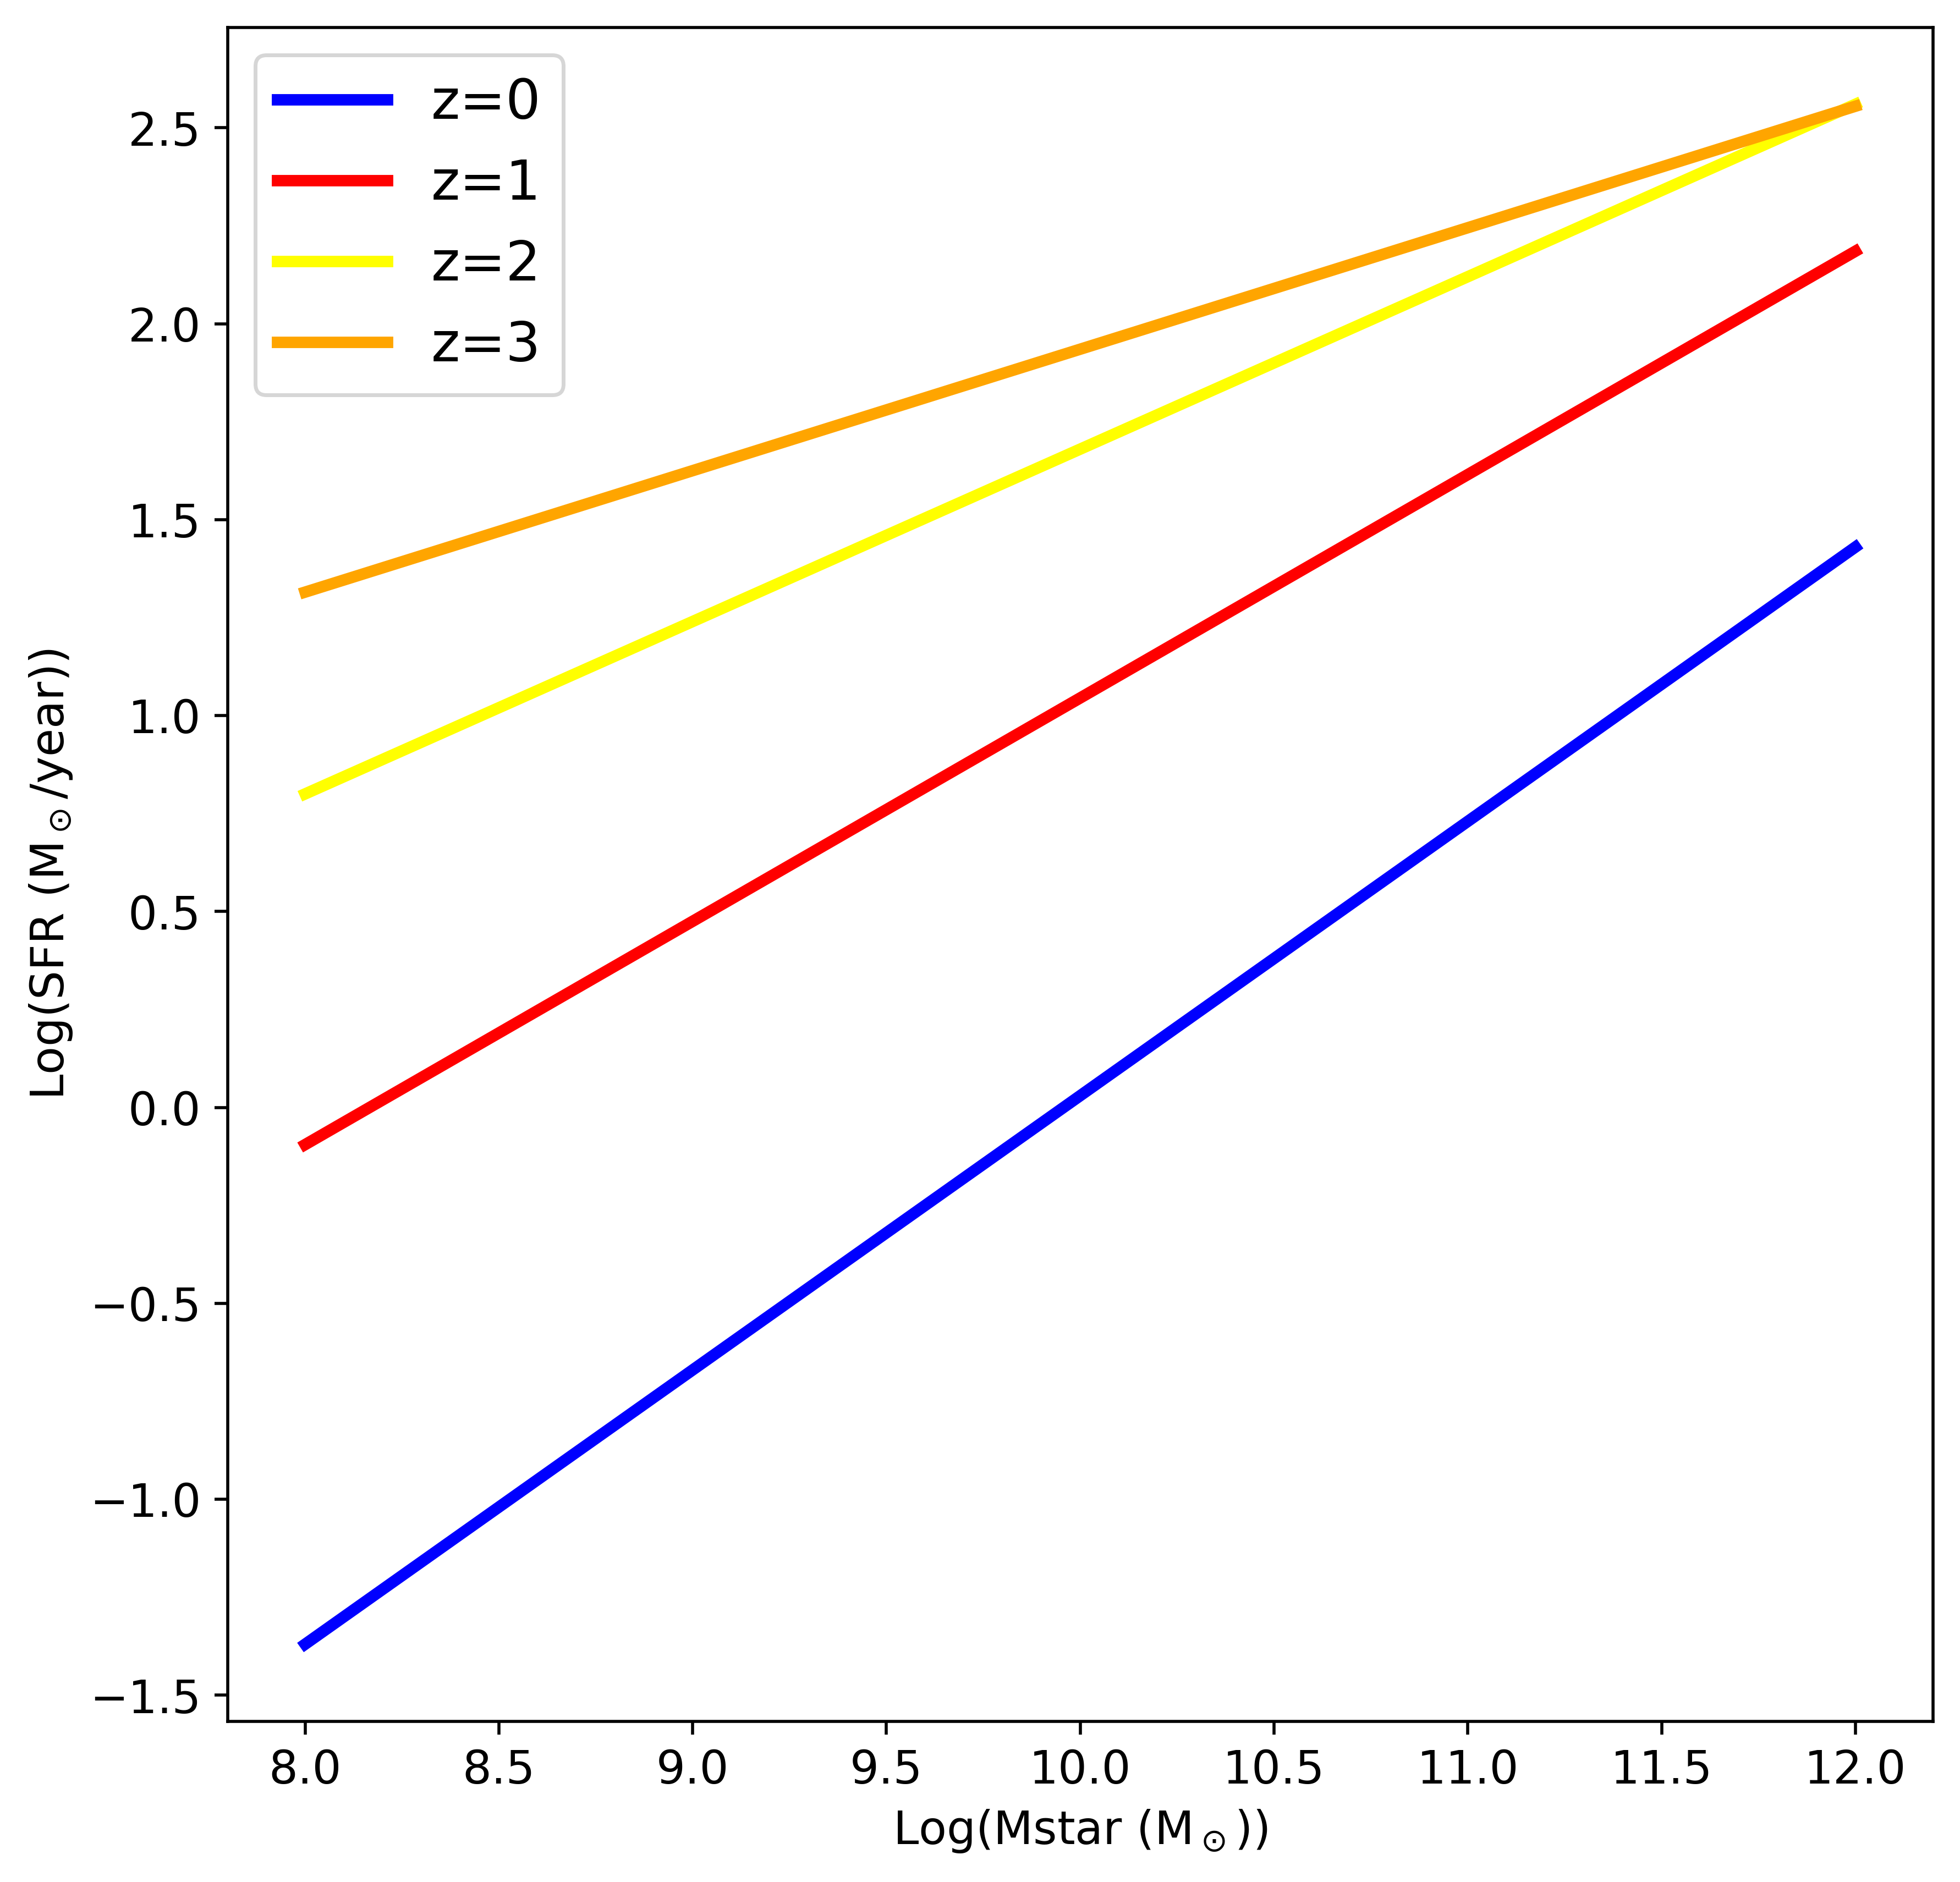

In [126]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.plot(np.log10(Mass), SFRMainSequence(Mass,0),
        color = 'blue', linewidth = 3, label = 'z=0')
plt.plot(np.log10(Mass), SFRMainSequence(Mass,1),
        color = 'red', linewidth = 3, label = 'z=1')
plt.plot(np.log10(Mass), SFRMainSequence(Mass,2),
        color = 'yellow', linewidth = 3, label = 'z=2')
plt.plot(np.log10(Mass), SFRMainSequence(Mass,3),
        color = 'orange', linewidth = 3, label = 'z=3')
# Add axis labels
plt.xlabel('Log(Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)

#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')

plt.show()
# Save file
plt.savefig('Lab8_SFR_MainSequence.png')


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [164]:
# normal galaxies 
TIR_Normal = 1e10*LsunErgS
print(10**StarFormationRate(TIR_Normal,'TIR'))

1.4892648150381245


In [166]:
# LIRGs  
TIR_LIRG = 1e11*LsunErgS
print(10**StarFormationRate(TIR_LIRG,'TIR'))

14.892648150381245


In [168]:
# ULIRGs
TIR_ULIRG = 1e12*LsunErgS
print(10**StarFormationRate(TIR_ULIRG,'TIR'))

148.92648150381245


In [170]:
# HLIRGs
TIR_HLIG = 1e13*LsunErgS
print(10**StarFormationRate(TIR_HLIG,'TIR'))

1489.2648150381244
